# I.Perkenalan

# GRADED CHALLENGE 3

Nama: Mathilda Hosiana Tambun

Batch: HCK 6




### Objective

 Dream Housing Finance company adalah perusahaan yang memberikan jenis layanan pinjaman dengan sistem mengotomatisasi proses penentuan kelayakan peminjam berdasarkan detail pelanggan yang diberikan saat mengisi formulir aplikasi pinjaman secara online. Tujuan utama dari masalah ini adalah untuk membangun model prediktif yang dapat memperkirakan apakah seorang pelanggan layak mendapatkan pinjaman berdasarkan data yang diberikan dalam formulir aplikasi pinjaman. Dengan adanya model yang mampu secara otomatis menentukan kelayakan peminjam berdasarkan data yang diberikan, perusahaan akan dapat memproses aplikasi pinjaman secara lebih efisien dan mengoptimalkan keputusan pemberian pinjaman.

# II. Import Libraries

In [1]:
# Penggunaanya pada Feature Selection
!pip install feature_engine

#Untuk membaca correlation string
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from phik import resources, report
from phik.report import plot_correlation_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


import pickle
import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

In [3]:
#Loading data into a dataframe
data = pd.read_csv('/content/sample_data/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
#Melihat 5 data terawal dari dataframe
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Melihat 5 data terbawah dari dataframe
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#Melihat keseluruhan info terkait dataset mempunyai data yang bertipe apa saja.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Pada dataset ini terdiri dari tipe data int64, float dan object dengan jumlah total kolom ada 13 dimana bila dilihat secara overview dataset ini memiliki banyak missing value di beberapa kolom seperti gender, dependents dan beberapa kolom lainnya. Bisa di lihat karena nilai non null pada baris tidak sama dengan dengan rangeindex.

In [7]:
#Melihat ringkasan statistik deskriptif dari suatu objek data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Bila kita lihat pada Loan amount term itu menjelaskan yang mengajukan pinjamkan dengan rata-rata jangka waktunya 342 hari dan rata- rata yang mengajukan pinjaman dengan meiliki pendapatan 5403 dollar dengan pendapatan paling tinggi 8100 dollar kemudian yang terendah pendapatannya perbulan 150 dollar. Standar deviasi sebesar 85.59 dollar menunjukkan bahwa jumlah pinjaman memiliki variasi atau penyebaran yang cukup besar dari nilai rata-rata sebesar 146.41 dollar. Ini menunjukkan bahwa ada perbedaan yang signifikan dalam jumlah pinjaman yang diberikan kepada pelamar, dengan beberapa pinjaman yang lebih tinggi atau lebih rendah dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi dan keragaman jumlah pinjaman yang diberikan oleh perusahaan.

In [8]:
# Duplikasi data set
data[data.duplicated()].shape

(0, 13)

Ternyata dataset ini tidak terdapat duplikasi dari 24 kolom pada dataset ini.

In [9]:
#Melihat apakah ada data yang missing values atau tidak.
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Ternyata pada dataset ini memiliki nilai missing value yang cukup banyak pada beberapa kolom seperti gender, credit history yang paling tingggi missing valuenya yang artinya tidak bisa di drop karena nilai missing valuenya di atas 5% dan juga sama seperti kolo loan amount itu juga diatas 5%.

In [10]:
# Data kategorikal
cat_col = list(data.select_dtypes(include='object'))
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
# numerical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', data[i].nunique())
    print('-' * 30)

Column:  Loan_ID
Total unique labels:  614
------------------------------
Column:  Gender
Total unique labels:  2
------------------------------
Column:  Married
Total unique labels:  2
------------------------------
Column:  Dependents
Total unique labels:  4
------------------------------
Column:  Education
Total unique labels:  2
------------------------------
Column:  Self_Employed
Total unique labels:  2
------------------------------
Column:  Property_Area
Total unique labels:  3
------------------------------
Column:  Loan_Status
Total unique labels:  2
------------------------------


In [12]:
# Data numerik
num_col =list(data.select_dtypes(include='number'))
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Bila dilihat data kategorikal lebih banyak dibandingkan numerik.

In [13]:
# numerical overview
for i in num_col:
    print('Column: ',i)
    print('Total unique labels: ', data[i].nunique())
    print('-' * 30)

Column:  ApplicantIncome
Total unique labels:  505
------------------------------
Column:  CoapplicantIncome
Total unique labels:  287
------------------------------
Column:  LoanAmount
Total unique labels:  203
------------------------------
Column:  Loan_Amount_Term
Total unique labels:  10
------------------------------
Column:  Credit_History
Total unique labels:  2
------------------------------


In [14]:
# Melihat data target imbalance atau tidak
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Target dari dataset ini adalah LOan Status dengan Y artinya pengajuan kredit di acc dan N pengajuaan kredit tidak di acc. Namun dataset ini imbalance pada target cenderung lebih condong untuk memprediksi mayoritas Y dengan akurasi yang tinggi, sementara kemampuan untuk memprediksi minoritas N mungkin lebih rendah.

## Data Cleaning

In [15]:
#Menampilkan kolom missing value yang akan di handling
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Handling missing value menggunakan fillna yang berbeda-beda
data["Gender"].fillna(method="backfill",inplace=True)
data["Married"].fillna(value="Yes",inplace=True)
data["Dependents"].fillna(value= 0,inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(value= 360,inplace=True)
data['Credit_History'].fillna(method="backfill", inplace=True)
data.drop('Loan_ID', axis=1, inplace=True)

Pada kolom gender mengisi nilai yang hilang pada kolom "Gender" dengan menggunakan metode backfill. Metode backfill mengisi nilai yang hilang dengan nilai dari baris berikutnya (baris selanjutnya) jika ada. pada kolom married mengisi dengan yes karena rata-rata orang yang mengabil kredit rumah sudah menikah. Dan mengisi kolo dependents dengan 0 kemudian pada loan amount Mengisi nilai yang hilang pada kolom "LoanAmount" dengan nilai rata-rata dari kolom tersebut. yang terakhir untuk kolom credit history mengisi nilai yang hilang pada kolom "LoanAmount" dengan nilai rata-rata dari kolom tersebut.

In [17]:
# Mengecek kembali kolom yang sudah di handling
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# IV. Exploratory Data Analysis (EDA)

Pada EDA ada dua untuk analisis dan modeling dimana pada analisis kita bisa melihat karakteristik dari dataset yang kita punya contoh kita ingin melihat data target kita yaitu loan status yang sudah di approve dan belum di approve menggunakan barplot atau jenis pie chart dll

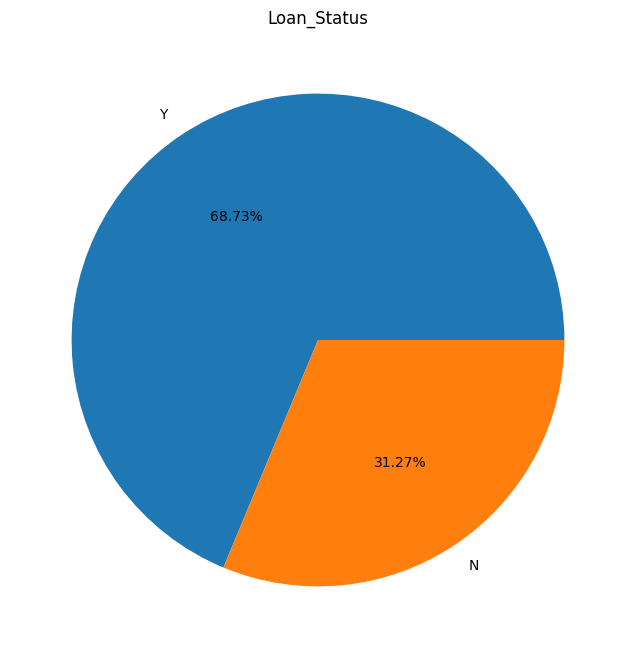

In [18]:
#make pie chart for default payment next mounth
plt.figure(figsize=(8, 8))
plt.pie(data['Loan_Status'].value_counts(), labels=data['Loan_Status'].value_counts().index, autopct='%.2f%%')
plt.title('Loan_Status')
plt.show()

Pada pie chart di atas kita dapat mengetahui yang sudah di approve pinjamannya secara online dan belum di approve. Ternyata sebanyak 31.27% calon peminjam yang di tolak pengajuan kreditnya dari keselurahan nasabah yang melakukan ingin melakukan peminjaman atau kredit.

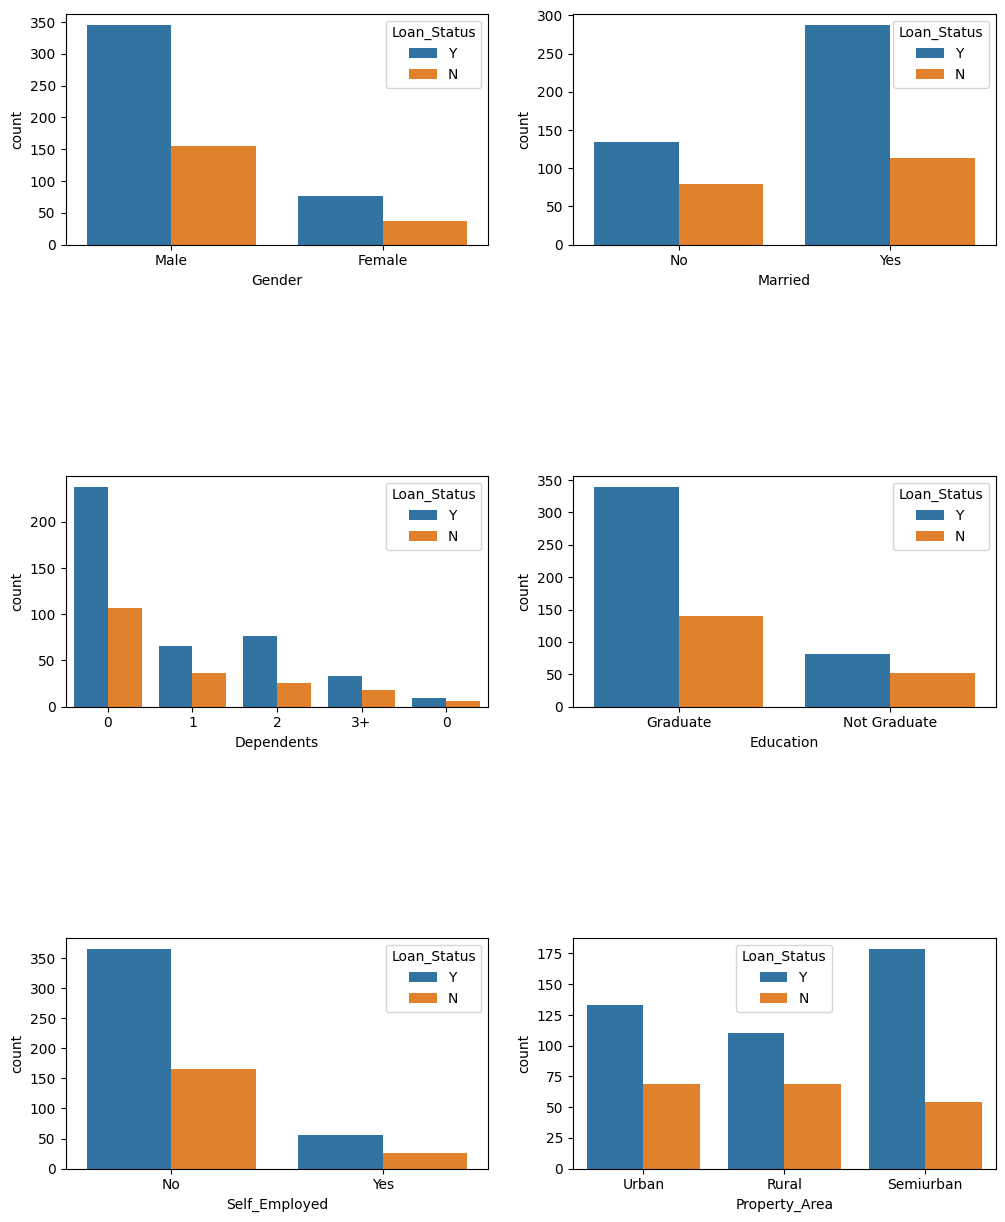

In [19]:
# Definisikan daftar nama kolom kategorikal dari DataFrame 'data'
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Buat subplot dan plot countplot untuk setiap kolom kategorikal
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
for idx, cat_col in enumerate(cat_col):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=axes[row, col])

# Adjust space antara subplot
plt.subplots_adjust(hspace=1)

# Tampilkan plot
plt.show()

Bila kita lihat, ternyata dari plot gender laki-laki lebih banyak di approve pengajuan kreditnya mungkin karena biasnaya laki-laki memiliki pendapatan yang lebih tinggi dari perempuan. Pada education akan lebih banyak yang graduate yang di acc pengjuannya karena pasti yang sudah graduate itu sudah bekerja dan memiliki penghasilan yang mungkin lebih tinggi. Pada self employed ternyata lebih banyak yang bukan menjadi wiraswasta di acc pengjuannya, kemungkinan orang yang wiraswasta itu usahanya terlihat kurang menjamin dari segi penghasilan mungkin yang tidak perbulan atau jaminan dari usaha kurang mendukung. Untuk property area lebih banyak yang di approve pada semiurban maka ini dapat menunjukkan bahwa area semiurban memiliki lebih banyak pelamar yang memenuhi syarat atau kriteria kelayakan untuk mendapatkan pinjaman daripada area urban atau rural.

# EDA For Modeling

In [20]:
#Menghitung matriks phi-k atau koefisien phi-k
phik_overview = data.phik_matrix()

interval columns not set, guessing: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


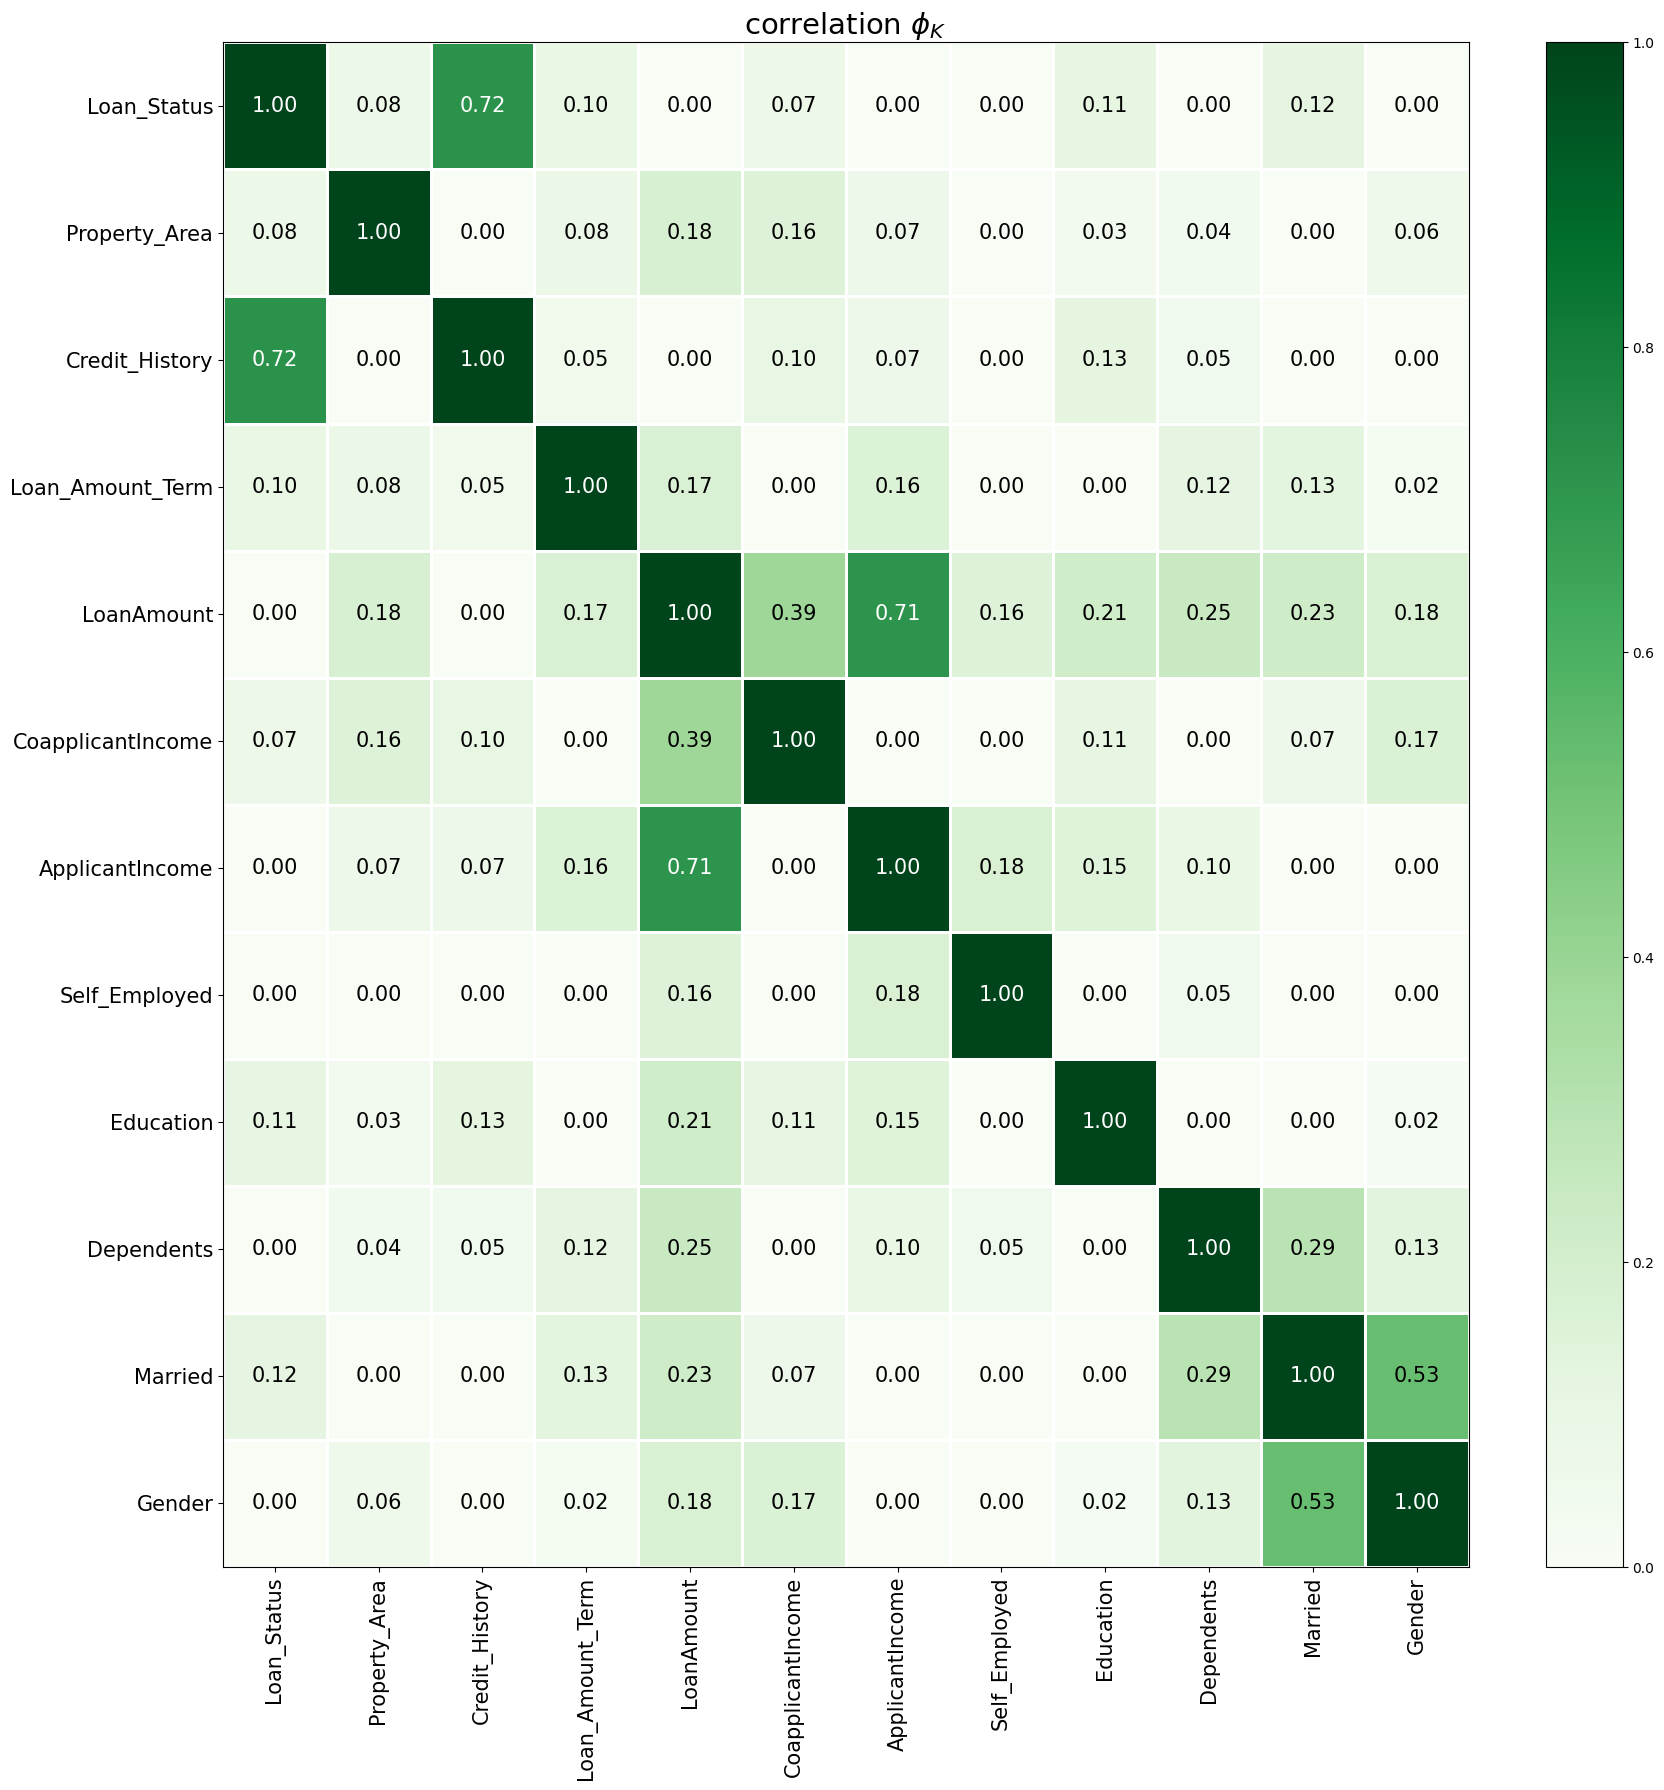

In [21]:
# Menampilkan hasil korelasi
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(18, 18))
plt.tight_layout()

Pada hasil output diatas kita dapat mengetahui korelasi dari data yang kita cari misalnya pada data ini yang menjadi target adalah loan status berarti kita lihat sumbu x loan status dan sumbut y loan status untuk melihat korelaisnya dan artinya setiap angka yang semakin tinggi itu menunjukkan yang plaing berkorelasi dan warna yang semkin hijau yang paling menunjukkan korelasi misalnya seperti credit history, education dan lain-lain

# V. Feature Engineering

## Feature Selection

In [22]:
#cek korelasi yang memiliki signifikansi terhadap default_payment_next_month
data.phik_matrix().Loan_Status.sort_values(ascending=False)

interval columns not set, guessing: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Loan_Status          1.000000
Credit_History       0.719167
Married              0.122257
Education            0.111321
Loan_Amount_Term     0.098014
Property_Area        0.078247
CoapplicantIncome    0.073062
Gender               0.000000
Dependents           0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
LoanAmount           0.000000
Name: Loan_Status, dtype: float64

Hasil output ini menunjukkan data yang memiliki nilai terdekat sampai nilai terendah dengan target yang kita inginkan. Jadi data yang terdekat adalah credit history, married, education, loan amount term dan sisa di antara data itu kita drop karena korelasinya tidak memiliki korelasi dengan treshold 0,1 yg kita inginkan.

In [23]:
#drop column selain pay_0, pay_2, pay_6, pay_3, pay_4, pay_5
data.drop(columns=['LoanAmount', 'ApplicantIncome', 'Self_Employed', 'Dependents', 'Gender', 'CoapplicantIncome', 'Property_Area', ], inplace=True)

In [24]:
#object column
cat_col = data.select_dtypes(include='object').columns.tolist()
cat_col

['Married', 'Education', 'Loan_Status']

In [25]:
#numeric column
num_col = data.select_dtypes(exclude='object').columns.tolist()
num_col

['Loan_Amount_Term', 'Credit_History']

In [26]:
#split data to train and test
X = data.drop(columns='Loan_Status')
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=101)

In [27]:
# menampilkan 5 data train teratas
X_train.head(5)

,Married,Education,Loan_Amount_Term,Credit_History
554,Yes,Graduate,180.0,0.0
97,Yes,Graduate,360.0,1.0
451,Yes,Not Graduate,300.0,0.0
145,Yes,Graduate,360.0,1.0
388,Yes,Graduate,360.0,1.0


In [28]:
# menampilkan data yang memiliki korelasi pada target
data

,Married,Education,Loan_Amount_Term,Credit_History,Loan_Status
0,No,Graduate,360.0,1.0,Y
1,Yes,Graduate,360.0,1.0,N
2,Yes,Graduate,360.0,1.0,Y
3,Yes,Not Graduate,360.0,1.0,Y
4,No,Graduate,360.0,1.0,Y
...,...,...,...,...,...
609,No,Graduate,360.0,1.0,Y
610,Yes,Graduate,180.0,1.0,Y
611,Yes,Graduate,360.0,1.0,Y
612,Yes,Graduate,360.0,1.0,Y


## Handling Outlier

Saya akan melakukan outlier handling terhadap fitur yang telah saya pilih, namun sebagaimana pada dataset yang tertera dengan data yang numerik.

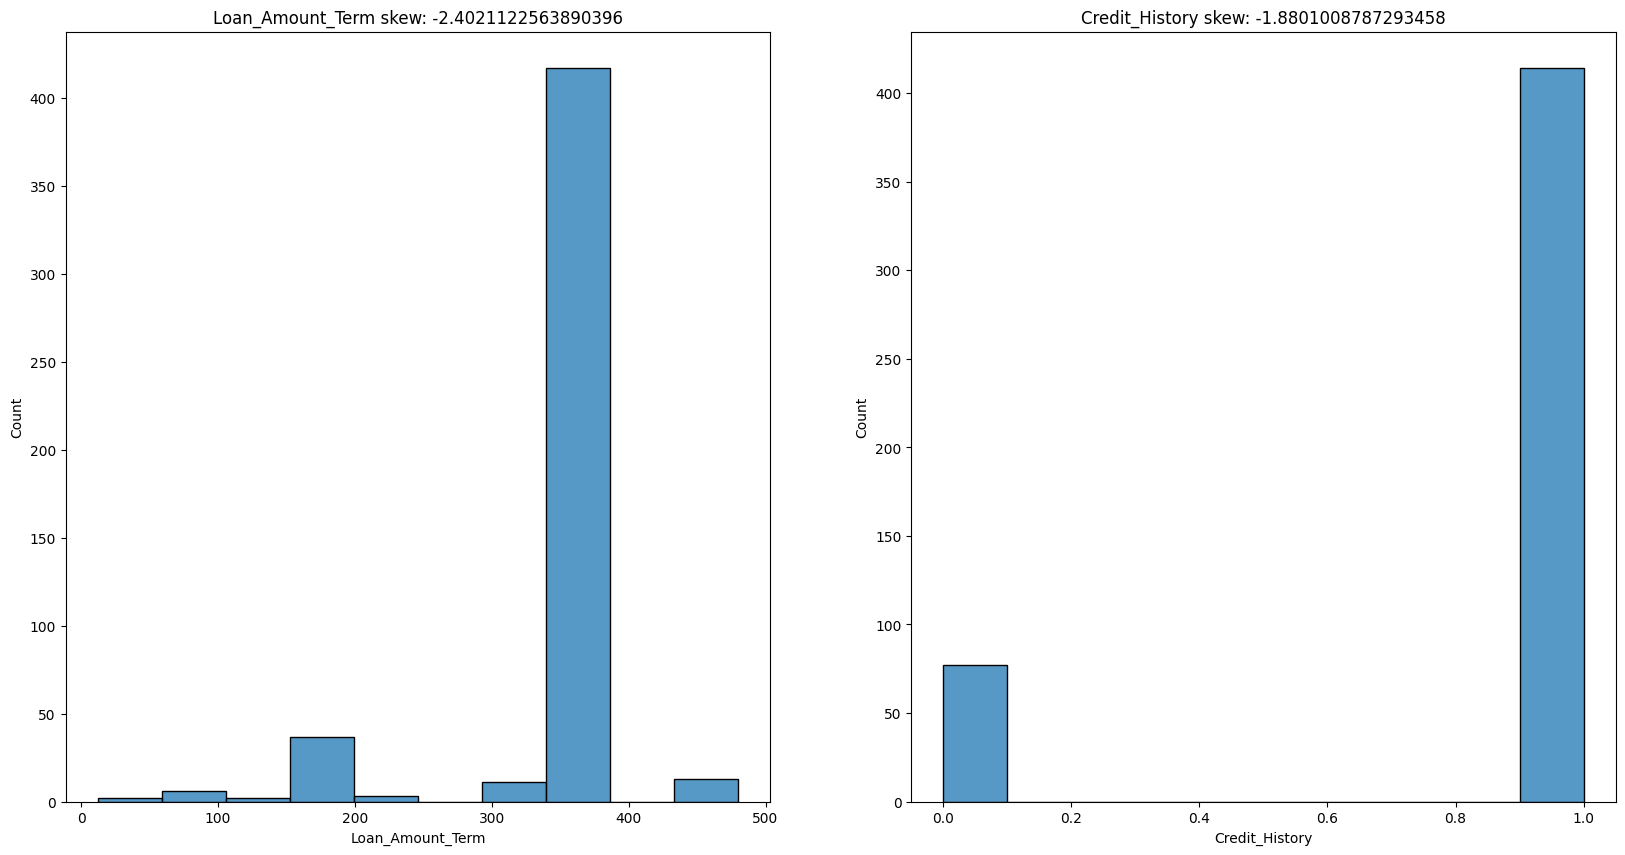

In [29]:
# fungsi untuk membuat histogram skew dari suatu fitur
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[20,10])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(X_train[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {data[col].skew()}')

Sebaran data dikatakan normal ketika memiliki nilai skewness (skew) yang mendekati atau sekitar nol. Skewness mengukur asimetri distribusi data. Jika skewness bernilai nol, maka distribusi data dianggap simetris. Untuk sebaran data loan amount term terdapat kemiringan sedikit ke kana  dan credit history juga ke kanan yang artinya terdistribusi tidak normal Ini menunjukkan bahwa ada beberapa nilai yang jauh lebih besar dari nilai rata-rata, yang menyebabkan skewness ke kanan.

In [30]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_dist(data, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(data[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(data[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(data[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=data[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(data[col].name + ' Kurtosis: ' + str(data[col].kurt()))
    print(data[col].name + ' Skewness: ' + str(data[col].skew()))
    if -0.5 <= data[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif data[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif data[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

In [31]:
data_col = X_train[num_col].columns.tolist()
data_col

['Loan_Amount_Term', 'Credit_History']

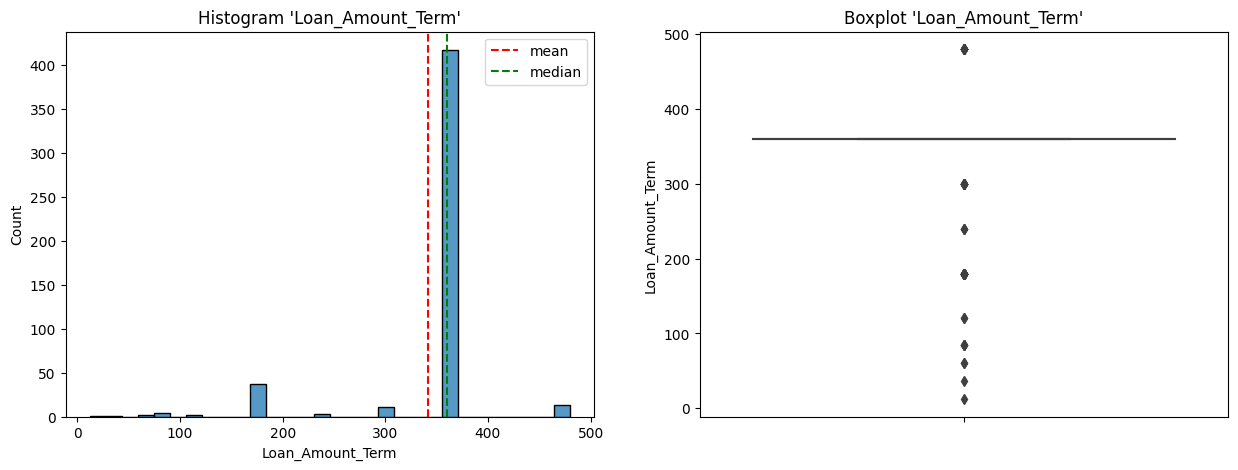

Loan_Amount_Term Kurtosis: 6.388306298566639
Loan_Amount_Term Skewness: -2.3077901289468037
Columns 'Loan_Amount_Term' left skewed


In [32]:
# skew dan boxplot dari limit_balance
plot_dist(X_train, data_col[0])

In [33]:
# outlier detection in pay_6
# gaussian
upper = X_train['Loan_Amount_Term'].mean() + (3*X_train['Loan_Amount_Term'].std())
lower = X_train['Loan_Amount_Term'].mean() - (3*X_train['Loan_Amount_Term'].std())

outlier = X_train[(X_train['Loan_Amount_Term'] <= lower) | (X_train['Loan_Amount_Term'] >= upper)]

print('percentage LOan_Amount_Term: ', len(outlier)/data.shape[0] * 100, '%')

percentage LOan_Amount_Term:  1.6286644951140066 %


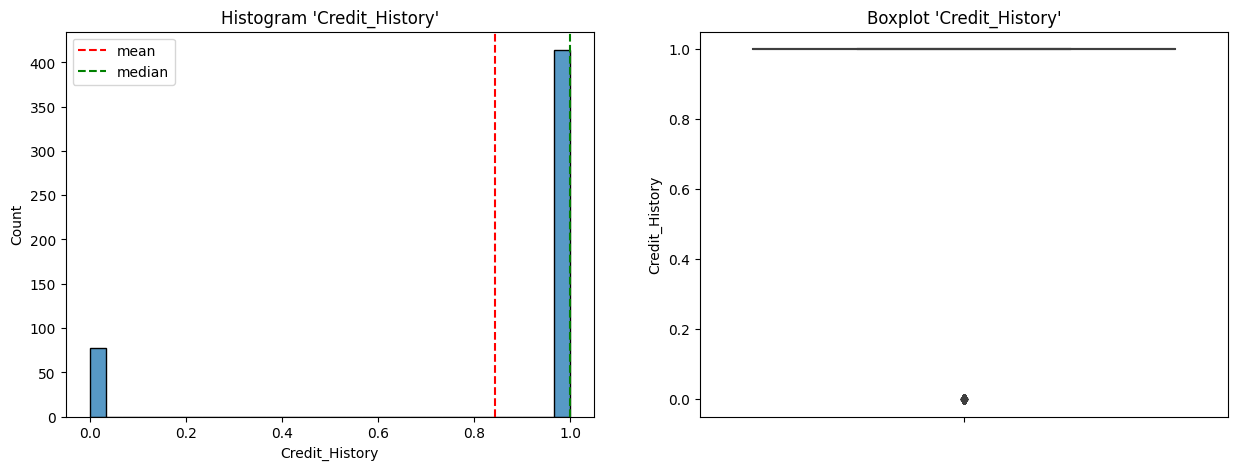

Credit_History Kurtosis: 1.5909639711396686
Credit_History Skewness: -1.8932775914340951
Columns 'Credit_History' left skewed


In [34]:
# skew dan boxplot dari Credit_History
plot_dist(X_train, data_col[1])

In [35]:
# outlier detection in Credit_History
# gaussian
upper = X_train['Credit_History'].mean() + (3*X_train['Credit_History'].std())
lower = X_train['Credit_History'].mean() - (3*X_train['Loan_Amount_Term'].std())

outlier = X_train[(X_train['Credit_History'] <= lower) | (X_train['Credit_History'] >= upper)]

print('percentage Credit_History: ', len(outlier)/data.shape[0] * 100, '%')

percentage Credit_History:  0.0 %


In [36]:
# Inisialisasi objek Winsorizer dengan argumen yang sesuai
windsoriser = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['Loan_Amount_Term', 'Credit_History'])

# Fitting Winsorizer pada data X_train
windsoriser.fit(X_train)

# Transformasi data X_train menggunakan Winsorizer
X_train = windsoriser.transform(X_train)

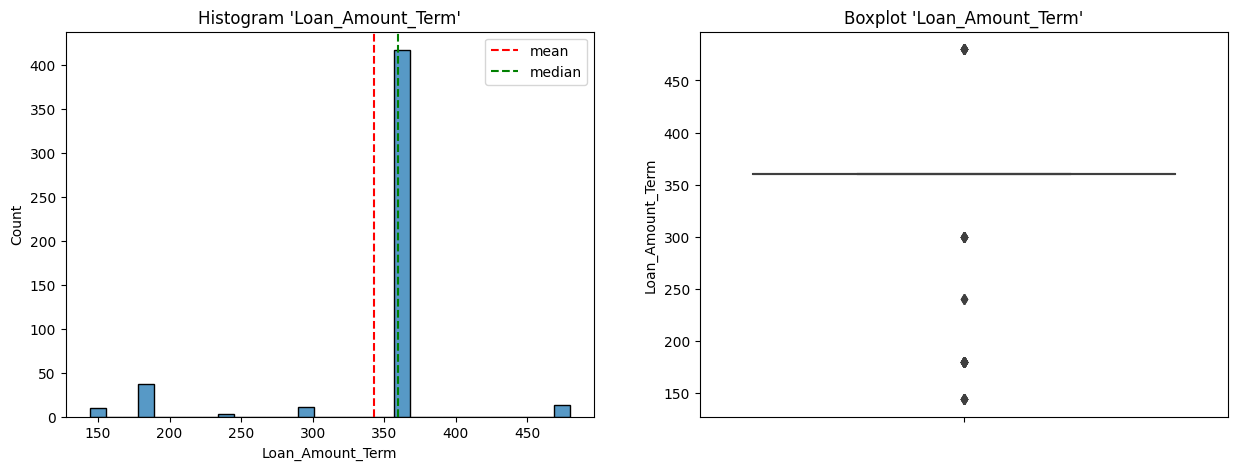

Loan_Amount_Term Kurtosis: 4.195377398355142
Loan_Amount_Term Skewness: -1.9250674759593522
Columns 'Loan_Amount_Term' left skewed


In [37]:
# plot setelah dilakukan capping
plot_dist(X_train, data_col[0])

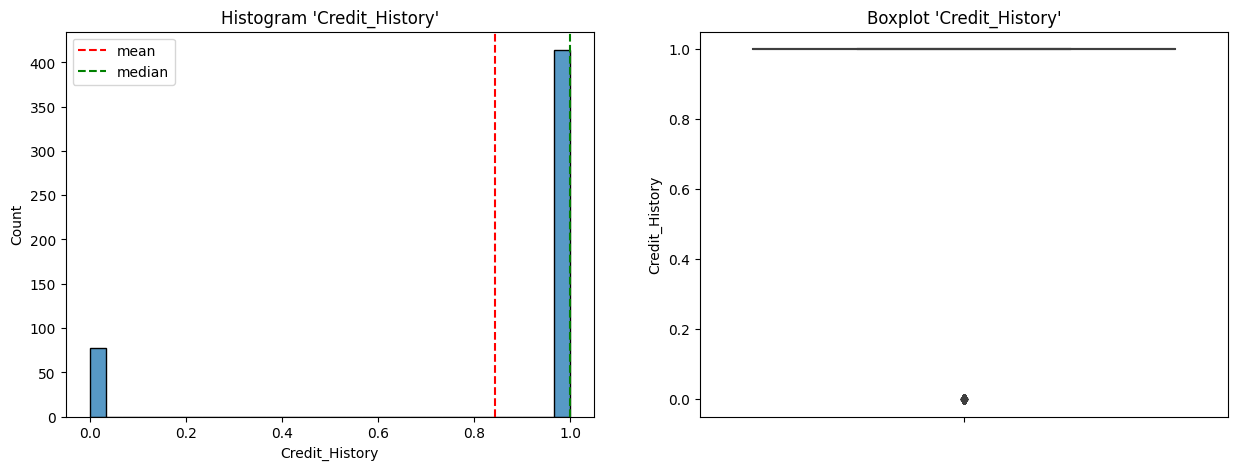

Credit_History Kurtosis: 1.5909639711396686
Credit_History Skewness: -1.8932775914340951
Columns 'Credit_History' left skewed


In [38]:
# plot setelah dilakukan capping
plot_dist(X_train, data_col[1])

## Preprocess


Pada tahap ini saya membuat fungsi pipeline.

**Outlier, Encoding & Scaling**

- Untuk outlier saya menggunakan winsorizer
- Untuk scaling, saya melakukan pada fitur data numerik dengan StandardScaler
- Saya menggunakan encoding karena adanya data kategorikal

In [39]:
# encod dengan label encoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [40]:
# Pipeline untuk data numerik
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', tail='both')),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['Loan_Amount_Term', 'Credit_History']])

Jadi penggunaan pipeline untuk menyatukkan beberapa treatment pada preprocess data seperti handling outlier menggunakan motode gaussian dan juga scaling menggunakan standart scal untuk membuat angka desimal lebih muda terbaca

In [41]:
# Buat pipeline dengan OrdinalEncoder
cat_pipeline = Pipeline([
    ('ordinal_enc', OrdinalEncoder())
])

# Pilih kolom yang akan diubah
columns_to_encode = ['Married', 'Education']
cat_tr = cat_pipeline.fit_transform(X_train[columns_to_encode])

# Konversi hasil encoding menjadi DataFrame dengan nama kolom yang sesuai
cat_df = pd.DataFrame(cat_tr, columns=columns_to_encode)

# Lakukan penggantian nilai-nilai tertentu
# Misalnya, Anda ingin mengganti nilai 0 dengan 'No' dan nilai 1 dengan 'Yes' untuk kolom 'Married'
cat_df['Married'] = cat_df['Married'].replace({0: 'No', 1: 'Yes'})

# Misalnya, Anda ingin mengganti nilai 0 dengan 'Not Graduate' dan nilai 1 dengan 'Graduate' untuk kolom 'Education'
cat_df['Education'] = cat_df['Education'].replace({0: 'Not Graduate', 1: 'Graduate'})

Pada precosess data caketgorikal di treatment menggunakan encoding yaitu dengan mengubah kategorikal menjadi numerik

In [42]:
# Memanggil data X_test
X_test

,Married,Education,Loan_Amount_Term,Credit_History
341,No,Graduate,360.0,1.0
349,Yes,Graduate,360.0,1.0
152,No,Graduate,360.0,1.0
268,No,Graduate,360.0,1.0
257,Yes,Graduate,360.0,1.0
...,...,...,...,...
480,No,Not Graduate,360.0,1.0
94,No,Not Graduate,120.0,1.0
358,Yes,Not Graduate,480.0,0.0
607,Yes,Not Graduate,360.0,1.0


In [43]:
# Menyatukan pipeline versi data numerik dan data kategorikal
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, ['Loan_Amount_Term', 'Credit_History']),
    ("cat_df", cat_pipeline, ['Married', 'Education'])
])

train_tr = full_pipeline.fit_transform(X_train)
test_tr = full_pipeline.transform(X_test)

# VI. Model Definition

Model yang akan saya gunakan adalah Logistic Regression, SVM, Decision Tree, Random Forest. Sesuai kriteria Milestone 2, saya akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan cross validation. Kemudian akan mendapatkan model terbaik dan dilakukan hyperparameter tuning, dan terakhir mengevaluasi performa sebelum dan sesudah melakukan tuning pada model tersebut.

In [44]:
logreg_mod = LogisticRegression(random_state=55)
svm_mod = SVC(random_state=55)
dtc_mod = DecisionTreeClassifier(random_state=55)
rfc_mod = RandomForestClassifier(random_state=55)

# VII. Model Training

0 itu acc kredit (+)

1 itu tidak acc kredit (-)

- True positif (0-0) acc dan terbaca acc
- False Negatif (1-0) tidak di acc dan di acc
- False Positif (0-1) acc dan terbaca tidak acc
-True negatif (1-1) tidak di acc dan terbaca tidak di acc

- pake recall karena melihat orang yang tidak di acc tapi terbaca di acc dan itu masuk ke False Negatif
kalo misalnya untuk false positif itu dalam dunia perbankan bisa di toleransi dengan turun langsung atau mengkonfirmasi secara langsung dari pada yang terjadi itu false negatif

Confusion Matrix dibagi menjadi 4 bagian, yaitu true positif, false positif, false negatif, dan true negatif. Sumbu Y dari confusion matrix adalah true label, sedangkan sumbu X dari confusion matrix adalah hasil prediksi kelas.

- True positif adalah label positif atau dalam hal ini label 0 berarti seseorang itu acc kreditnya dan terbaca di acc
- False positif adalah seseorang acc dan terbaca tidak acc
- True negatif adalah seseorang tidak di acc dan terbaca tidak di acc.
- False negatif adalah seseorang tidak di acc dan di acc

## Logistic Regression

In [45]:
#Melihat insight model Logistic Regression
logreg_mod.fit(train_tr, y_train)

lr_train = logreg_mod.predict(train_tr)
lr_test = logreg_mod.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.86      0.43      0.57       154
           1       0.79      0.97      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.70      0.72       491
weighted avg       0.81      0.80      0.78       491

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



- Accuracy adalah jumlah titik data yang diprediksi dengan benar dari semua titik data.
- Precision adalah rasio pengamatan positif yang diprediksi dengan benar terhadap total pengamatan positif yang diprediksi.
- Recall adalah rasio pengamatan positif yang diprediksi dengan benar terhadap semua pengamatan di kelas yang sebenarnya
- F1-score adalah rata-rata tertimbang dari Precision dan Recall.

---
Lalu metrik yang akan saya gunakan adalah recall karena melihat orang yang tidak tidak di acc tapi terbaca di acc dan itu masuk ke False Negatif.


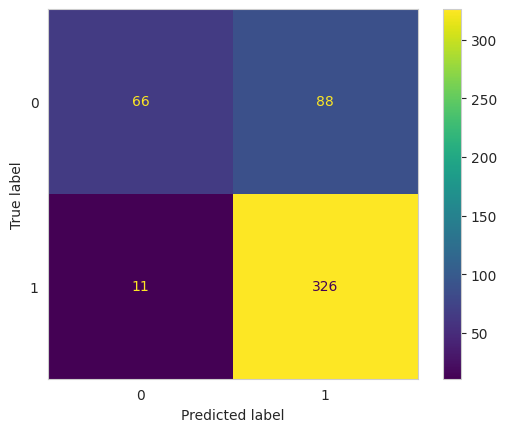

In [46]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, lr_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

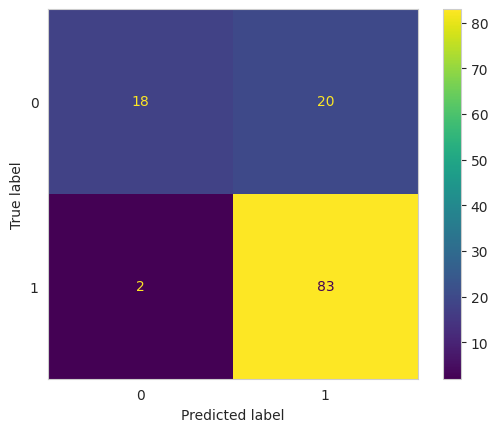

In [47]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, lr_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

Kalo kita lihat pada tabel ada true label atau sama dengan data actual dan predict label sebagai prediksi hasil dari pemodelan kita. Pada gambar juga kita bisa mengetahui karakteristik dari setiap ke empat kotak tersebut misalnya saat nilai 0 - 0 itu artinya true positif dimana yang di setujui untuk pinjaman itu sebanyak 18 orang, lalu 0 - 1 itu kondisi false positif artinya jumlah orang yang sudah di acc namun tidak terprediksi atau tidak terbaca di acc. Biasanya hal ini sering terjadi di dunia perbankan yang membuat nasabah akhirnya memutuskan meninggalkan bank karena pinjaman tidak di acc. Ketiga saat kondisi false negatif dimana nasabah sebanyak 2 orang tidak di acc pengajuan pinjamannya namun terbaca di acc pinjaman kredit ini akan menjadi sebuah permaslahan besar buat perushaan apabila kesalahan itu memnyebabkan kerugian yang sangat berpengaruh dalam kenaikan keuntungan perusahaan. Terakhir kondisi true negatif yaitu kita bisa mengetahui jumlah nasabah yang di tolak sebanyak 83 orang dan hasil prediksi juga sama 83 orang.

## SVM

In [48]:
# Inisialisasi objek model SVC
svc_mod = SVC()

# Melatih model menggunakan data pelatihan dan label kelas
svc_mod.fit(train_tr, y_train)

# Menggunakan model yang telah dilatih untuk memprediksi data pelatihan dan data uji
svc_train = svc_mod.predict(train_tr)
svc_test = svc_mod.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.84      0.45      0.59       154
           1       0.79      0.96      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.71      0.73       491
weighted avg       0.81      0.80      0.78       491

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



Interpretasi yang dapat diperoleh dari data test model svm adalah :

- Precision : dari semua orang yang diprediksi di acc adalah 0.90 sedangkan dari orang yang diprediksi tidak di acc adalah 0.81.
- Recall : dari semua orang yang diprediksi acc adalah 0.47 sedangkan dari orang yang diprediksi tidak di acc adalah 0.98
- F1-score : dari semua orang yang diprediksi acc adalah 0.62 sedangkan dari orang yang diprediksi tidak di acc adalah 0.88

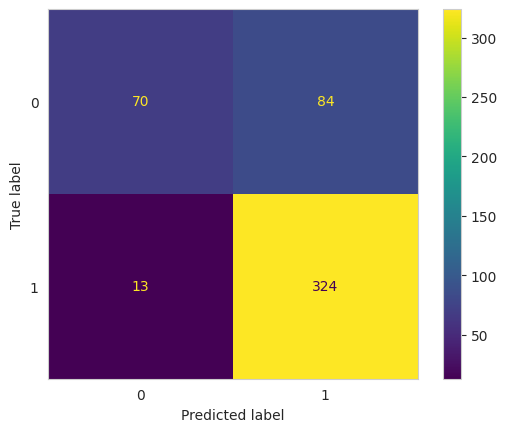

In [49]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, svc_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

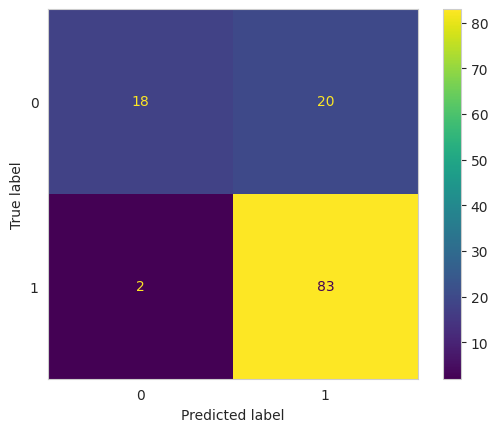

In [50]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, svc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## DecisionTreeClassifier Model

In [51]:
#Melihat insight model dtc
dtc_mod.fit(train_tr, y_train)

dtc_train = dtc_mod.predict(train_tr)
dtc_test = dtc_mod.predict(test_tr)

print(classification_report(y_train, dtc_train))
print(classification_report(y_test, dtc_test))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61       154
           1       0.80      0.96      0.87       337

    accuracy                           0.81       491
   macro avg       0.83      0.72      0.74       491
weighted avg       0.82      0.81      0.79       491

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123



Interpretasi yang dapat diperoleh dari data test model svm adalah :

- Precision : dari semua orang yang diprediksi di acc adalah 0.86 sedangkan dari orang yang diprediksi tidak di acc adalah 0.82.
- Recall : dari semua orang yang diprediksi acc adalah 0.72 sedangkan dari orang yang diprediksi tidak di acc adalah 0.81
- F1-score : dari semua orang yang diprediksi acc adalah 0.61 sedangkan dari orang yang diprediksi tidak di acc adalah 0.88

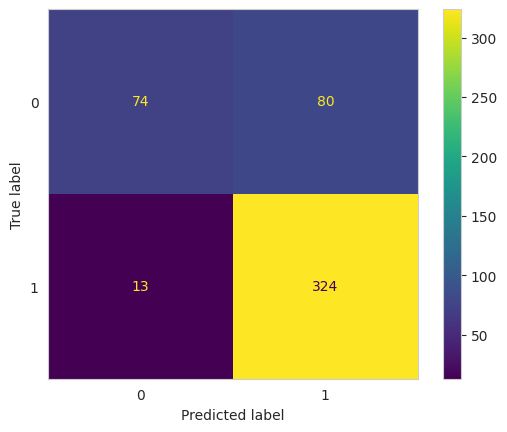

In [52]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, dtc_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

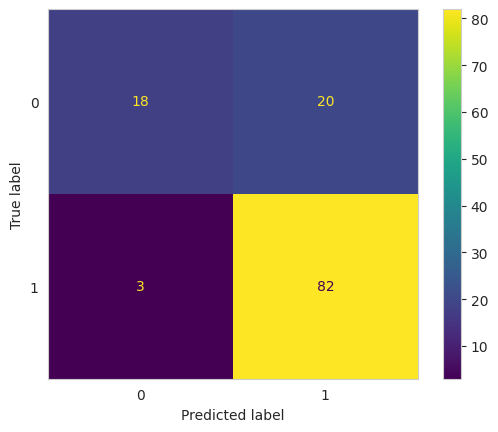

In [53]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, dtc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## RandomForestClassifier Model

In [54]:
#Melihat insight model RandomForestClassifier
rfc_mod.fit(train_tr, y_train)

rfc_train = rfc_mod.predict(train_tr)
rfc_test = rfc_mod.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61       154
           1       0.80      0.97      0.88       337

    accuracy                           0.81       491
   macro avg       0.83      0.72      0.74       491
weighted avg       0.82      0.81      0.79       491

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123



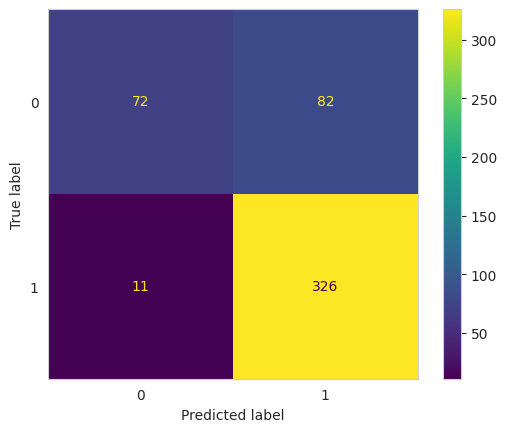

In [55]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_train, rfc_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

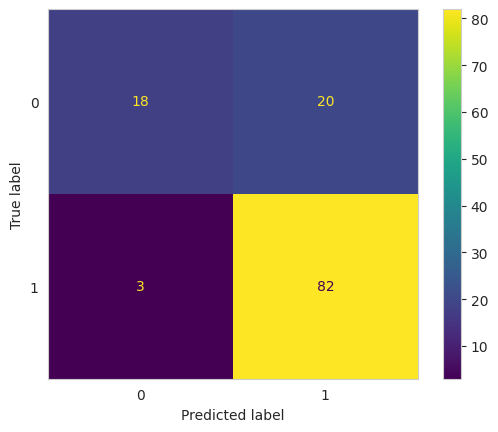

In [56]:
#confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, rfc_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

## Cross Validation

In [57]:
#Cross-validation Logreg
logreg_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', LogisticRegression(random_state=42))
    ])
scores_logreg = cross_val_score(logreg_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(scores_logreg)
print(scores_logreg.mean())

[0.97058824 0.96969697 0.96969697 0.93939394 0.97058824 0.97058824
 0.97058824 0.97058824 0.94117647 1.        ]
0.9672905525846703


Dengan menggunakan cross-validation, kita dapat menghindari bias yang mungkin muncul akibat pemilihan dataset training dan testing yang spesifik. Hasil cross-validation memberikan gambaran yang lebih objektif tentang performa model Logistic Regression secara umum dimana rata-rata dari logreg itu 0,96. Penggunaan recall sendiri untuk melihat bagaimana menanggulangi pengaruh dari False negtif (1-0) tidak di acc tapi terbaca acc. Hal tersebut sangat berpengaruh buruk pada perusahaan yang membuat nilai kerugian yang cukup tinggi jadi pada cross validation kita dapat melihat atau mengetahu model terbaik dari penggunaan recall.

In [58]:
#Cross-validation SVM
svm_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', SVC(random_state=42))
    ])
scores_svm = cross_val_score(svm_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(scores_svm)
print(scores_svm.mean())

[0.94117647 0.96969697 0.93939394 0.87878788 0.97058824 0.97058824
 0.97058824 0.97058824 0.94117647 1.        ]
0.955258467023173


Pada cross validation svm menghasilkan rata-rata sebesar 0,95 dalam perbandingan dengan model Logistic Regression yang sebelumnya, terlihat bahwa model SVM memiliki nilai recall yang lebih tinggi. Hal ini menunjukkan bahwa model SVM cenderung lebih baik dalam mengidentifikasi instance yang sebenarnya positif.

In [59]:
#Cross-validation DecisionTreeClassifier
dtc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
scores_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(scores_dtc)
print(scores_dtc.mean())

[0.91176471 0.93939394 0.90909091 0.84848485 0.94117647 0.91176471
 0.94117647 0.97058824 0.94117647 1.        ]
0.9314616755793226


Pada cross validation dengan pemodelan decision tree atau tree best model ini nilai rata-rata dari nilai recall tersebut adalah 0.93. jadi hasilnya model DTC menunjukkan performa yang lebih rendah dalam hal recall dibandingkan dengan model Logistic Regression dan SVM.

In [60]:
#Cross-validation RandomForestClassifier
rfc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', RandomForestClassifier(random_state=42))
    ])
scores_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(scores_rfc)
print(scores_rfc.mean())

[0.91176471 0.93939394 0.90909091 0.84848485 0.97058824 0.97058824
 0.94117647 0.97058824 0.94117647 1.        ]
0.9402852049910873


Jadi pada cross validation dengan menggunakan randomforest menunjukkan bahwa model RFC memiliki nilai recall yang bervariasi pada setiap fold cross-validation. Rata-rata recall dari seluruh fold adalah sekitar 0.94. Recall mengukur sejauh mana model mampu mengidentifikasi dengan benar instance yang sebenarnya positif. Dalam perbandingan dengan model-model sebelumnya, terlihat bahwa model RFC memiliki nilai recall yang lebih tinggi daripada model DTC, tetapi sedikit lebih rendah daripada model SVM.

In [61]:
nama_model = []
cv_scores=0
for cv,name in zip([scores_logreg, scores_svm, scores_dtc, scores_rfc],
    ['log_mod','svm_mod', 'dtc_mod', 'rfc_mod']):
    print(name)
    print('All - Cross Validation  : ', cv)
    print('Mean - Cross Validation : ', cv.mean())
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        nama_model = name
    else:
        pass
print('best model:', nama_model)
print('cross-val mean:', cv_scores)

log_mod
All - Cross Validation  :  [0.97058824 0.96969697 0.96969697 0.93939394 0.97058824 0.97058824
 0.97058824 0.97058824 0.94117647 1.        ]
Mean - Cross Validation :  0.9672905525846703
--------------------------------------------------
svm_mod
All - Cross Validation  :  [0.94117647 0.96969697 0.93939394 0.87878788 0.97058824 0.97058824
 0.97058824 0.97058824 0.94117647 1.        ]
Mean - Cross Validation :  0.955258467023173
--------------------------------------------------
dtc_mod
All - Cross Validation  :  [0.91176471 0.93939394 0.90909091 0.84848485 0.94117647 0.91176471
 0.94117647 0.97058824 0.94117647 1.        ]
Mean - Cross Validation :  0.9314616755793226
--------------------------------------------------
rfc_mod
All - Cross Validation  :  [0.91176471 0.93939394 0.90909091 0.84848485 0.97058824 0.97058824
 0.94117647 0.97058824 0.94117647 1.        ]
Mean - Cross Validation :  0.9402852049910873
--------------------------------------------------
best model: log_mod
c



Berdasarkan rata-rata pengembalian semua model, Logistic regresion adalah model dengan kinerja terbaik dengan rata-rata pengembalian 0,967. Hal ini menunjukkan bahwa model Logistic regresion lebih mampu mengidentifikasi kasus yang benar-benar positif. Kita jadi mengetahui model apa yang cocok dengan dataset yang kita gunakan agar problem dari case ini dapat tersampaik dengan baik dan benar.
Namun, penting untuk diingat bahwa kesimpulan ini didasarkan pada hasil cross-validation dan perlu diperhatikan juga faktor lain seperti metrik evaluasi lainnya, konteks masalah, serta pertimbangan lain yang relevan dalam memilih model terbaik untuk kasus yang sedang dihadapi.

# VII. Model Evaluation

##Tunning

In [62]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['Loan_Amount_Term', 'Credit_History']),
                                ('cat_df',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder())]),
                                 ['Married', 'Education'])])

In [63]:
train_tr

array([[-2.75585234, -2.3187547 ,  1.        ,  0.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [-0.73317837, -2.3187547 ,  1.        ,  1.        ],
       ...,
       [ 0.27815861,  0.43126597,  1.        ,  1.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [-2.75585234, -2.3187547 ,  1.        ,  1.        ]])

In [64]:
test_tr

array([[ 0.27815861,  0.43126597,  0.        ,  0.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [ 0.27815861,  0.43126597,  0.        ,  0.        ],
       [ 0.27815861,  0.43126597,  0.        ,  0.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [-2.75585234,  0.43126597,  1.        ,  0.        ],
       [ 0.27815861, -2.3187547 ,  0.        ,  0.        ],
       [ 0.27815861, -2.3187547 ,  1.        ,  0.        ],
       [ 2.30083258,  0.43126597,  1.        ,  1.        ],
       [ 0.27815861,  0.43126597,  0.        ,  0.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [ 0.27815861,  0.43126597,  0.        ,  0.        ],
       [ 0.27815861,  0.43126597,  1.        ,  0.        ],
       [ 0.27815861, -2.3187547 ,  0.        ,  0.        ],
       [-3.06379201,  0.43126597,  0.        ,  1.        ],
       [-1.74451535,  0.43126597,  1.        ,  0.        ],
       [ 0.27815861,  0.

In [65]:
y_train

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [66]:
# Gabungkan pipeline untuk data kategorikal dan numerikal menggunakan ColumnTransformer
preprocessor = ColumnTransformer([
  ("num", num_pipeline, ['Loan_Amount_Term', 'Credit_History']),
    ("cat_ohe", cat_pipeline, ['Married', 'Education'])
])

In [67]:
# Gabungkan preprocessor dengan model Logistic Regression
logreg_mod = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(random_state=42))
])


In [68]:
 # Definisikan daftar nilai hyperparameter yang ingin diuji
param_grid = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.01, 0.1, 1, 10, 100]
}

# Inisialisasi objek GridSearchCV dengan pipeline dan parameter grid yang ingin diuji
grid_search = GridSearchCV(logreg_mod, param_grid, cv=5, scoring='recall')



In [69]:
# Lakukan fitting GridSearchCV pada data pelatihan untuk mencari hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan hyperparameter terbaik dari GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'model__C': 0.01, 'model__penalty': 'l2'}


In [70]:
# Melihat insight dari model Logistic Regression dengan hyperparameter terbaik
model = grid_search.best_estimator_
model.fit(X_train, y_train)

lr_train = model.predict(X_train)
lr_test = model.predict(X_test)

print("Classification Report - Data Pelatihan:")
print(classification_report(y_train, lr_train))

print("Classification Report - Data Uji:")
print(classification_report(y_test, lr_test))

Classification Report - Data Pelatihan:
              precision    recall  f1-score   support

           0       0.86      0.43      0.57       154
           1       0.79      0.97      0.87       337

    accuracy                           0.80       491
   macro avg       0.82      0.70      0.72       491
weighted avg       0.81      0.80      0.78       491

Classification Report - Data Uji:
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.81      0.98      0.88        85

    accuracy                           0.82       123
   macro avg       0.85      0.73      0.75       123
weighted avg       0.83      0.82      0.80       123



# IX. Model Saving

In [71]:
#sava all report and show it
all_reports = {}
cv_score = {
    'logreg': scores_logreg.mean(),
    'svc': scores_svm.mean(),
    'dtc': scores_dtc.mean(),
    'rfc': scores_rfc.mean(),

}
all_reports['Baseline (Default Hyperparameter)'] = cv_score
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
dtc,0.931462
logreg,0.967291
rfc,0.940285
svc,0.955258


In [72]:
all_process = Pipeline([
    ("classification", model)
])

In [73]:
all_process

Pipeline(steps=[('classification',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('outlier',
                                                                                    Winsorizer(tail='both')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Loan_Amount_Term',
                                                                    'Credit_History']),
                                                                  ('cat_ohe',
                                                                   Pipeline(steps=[('ordinal_enc',
                                                                                    OrdinalEncoder())]),
                                                                   ['Married',
                                                                    'Education'])])),
                                 ('model',
                                  LogisticRegression(C=0.01,
                                                     random_state=42))]))])

In [74]:
pickle.dump(all_process, open('Loan_Status.pkl', 'wb'))

# X. Model Inference

In [75]:
models = pickle.load(open('Loan_Status.pkl', 'rb'))

In [76]:
dummy_data = pd.DataFrame({
    'Married': [150000, 170000, 240000, 400000, 280000],
    'Education': [29, 32, 28, 26, 39],
    'Loan_Amount_Term': [-1, 2, -1, -1, -1],
    'Credit_History': [46625, 2097, 133230, 2871, 1466],

})

In [77]:
dummy_data

,Married,Education,Loan_Amount_Term,Credit_History
0,150000,29,-1,46625
1,170000,32,2,2097
2,240000,28,-1,133230
3,400000,26,-1,2871
4,280000,39,-1,1466


In [78]:
models

Pipeline(steps=[('classification',
                 Pipeline(steps=[('preprocess',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('outlier',
                                                                                    Winsorizer(tail='both')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Loan_Amount_Term',
                                                                    'Credit_History']),
                                                                  ('cat_ohe',
                                                                   Pipeline(steps=[('ordinal_enc',
                                                                                    OrdinalEncoder())]),
                                                                   ['Married',
                                                                    'Education'])])),
                                 ('model',
                                  LogisticRegression(C=0.01,
                                                     random_state=42))]))])

# XI. Pengambilan Kesimpulan

- Scoring recall digunakan untuk melihat false negtif agar kita mengetahui total nasabah yang tidak di acc pengjuan kreditnya tapi terbaca sudah di acc pengajuan kreditnya agar kita bisa meminimalisir kerugian dari perusahaan dengan jenis layanan kartu kredit.
- Saya juga telah membuat model logistic regresion dengan hyperparameter tuning, tetapi model tersebut tidak mengalami perubahan yang signifikan. Hal ini dapat disebabkan oleh beberapa hal yaitu diantaranya kelas target yang tidak seimbang atau data yang imbalance dan kurangnya mencari model yang cocok.
- Model yang digunkanan untuk memprediksi kemungkinan tersebut adalah model logistic regression dengan nilai recall 0.43 yaitu nilai sama
-  Berdasarkan hasil olah data diatas, model logistic regression menunjukkan performa yang lebih baik dalam hal recall dibandingkan dengan model-model lain yang dievaluasi. Oleh karena itu, model logistic regression dapat dianggap sebagai salah satu pilihan yang lebih baik untuk tugas klasifikasi ini. Namun, penting untuk melakukan evaluasi lebih lanjut dan mempertimbangkan faktor lain seperti metrik evaluasi lainnya, konteks masalah, dan pertimbangan lain yang relevan sebelum membuat keputusan akhir.